In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/BBDD/titanic_train.csv"
df = pd.read_csv(path, sep=',')
df.info()

path_test = "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/BBDD/titanic_test.csv"
df_test = pd.read_csv(path_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = df.drop(columns=["PassengerId"])
df_test = df_test.drop(columns=["PassengerId"])

In [7]:
df.duplicated().sum()

df.head()
df.describe().T

df_test.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

#age, Embarked, Cabin

df["Embarked"].value_counts()

df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0])

In [9]:
df.isnull().sum()
df["Cabin"].value_counts()
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])
df_test["Cabin"] = df_test["Cabin"].fillna(df_test["Cabin"].mode()[0])

In [10]:
df.isnull().sum()
df_test.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0
Embarked,0


 3. Análisis Exploratorio de Datos (EDA):

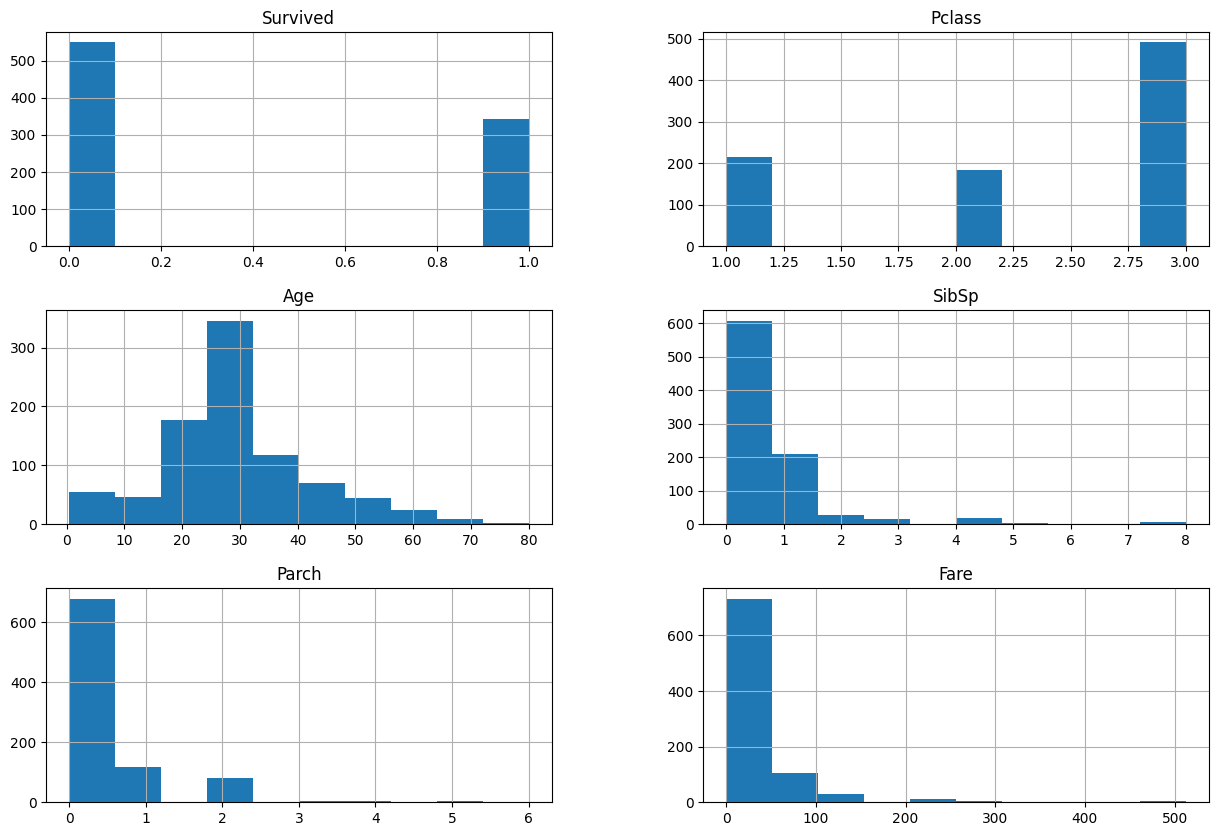

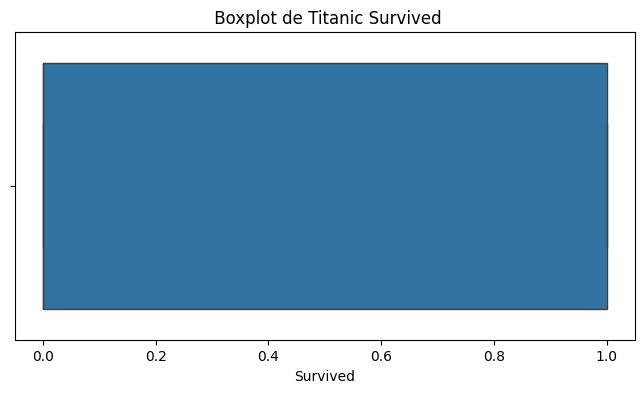

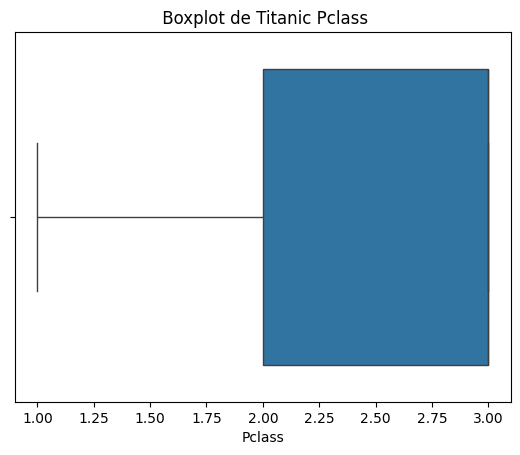

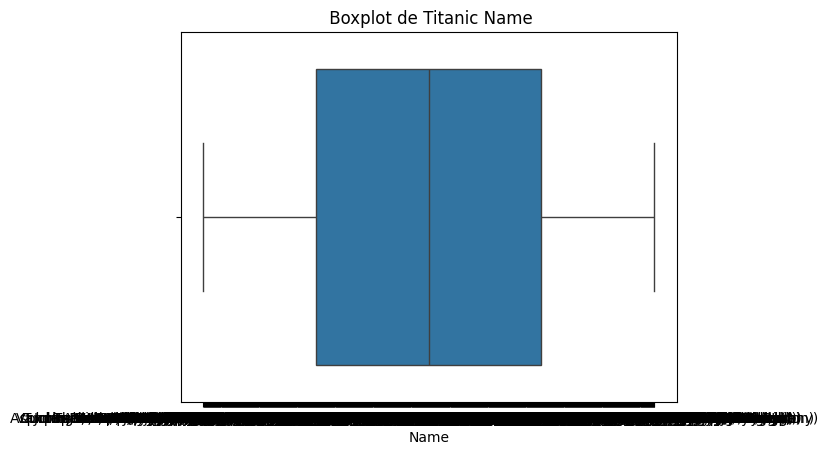

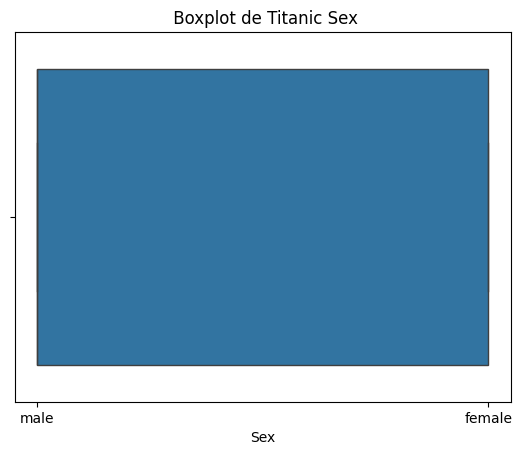

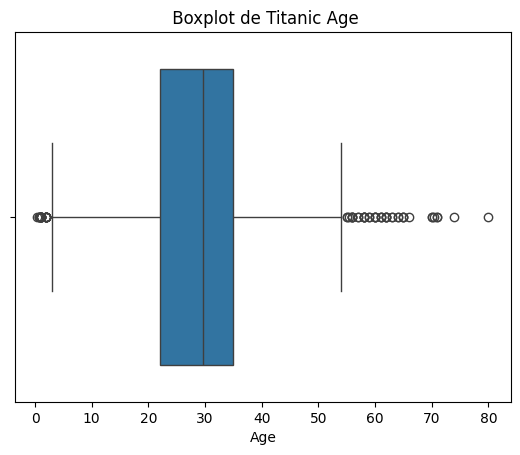

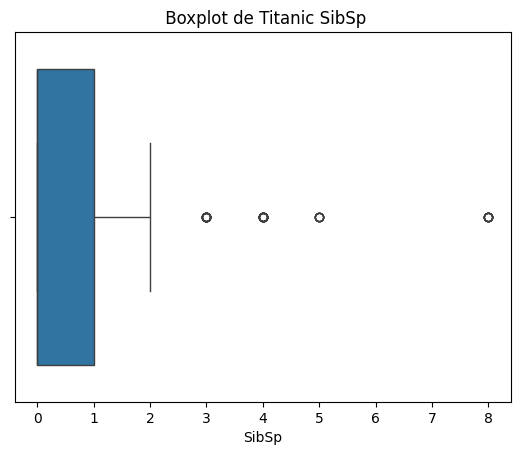

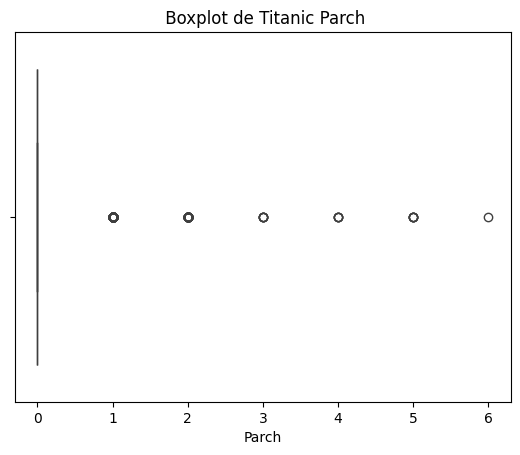

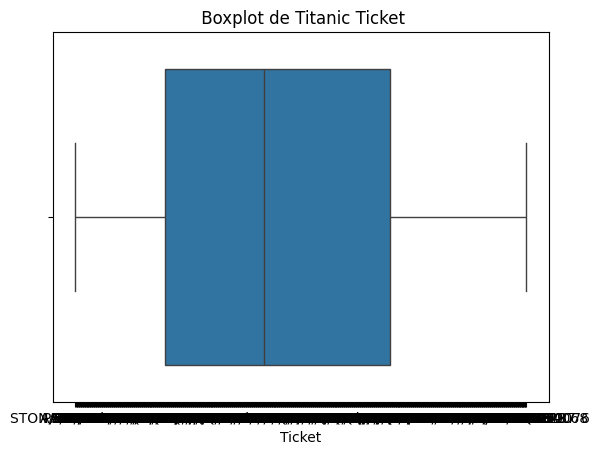

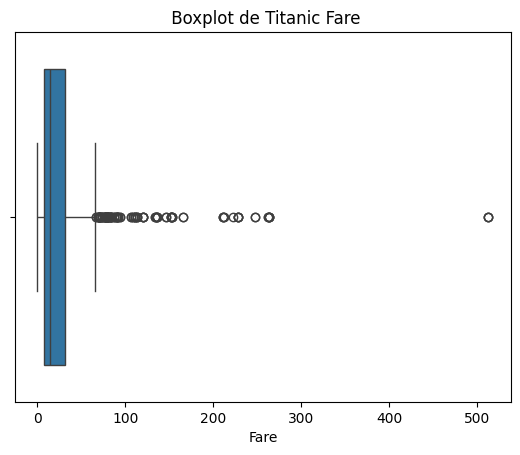

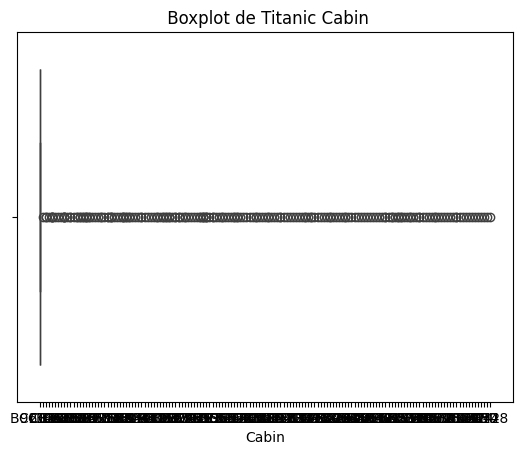

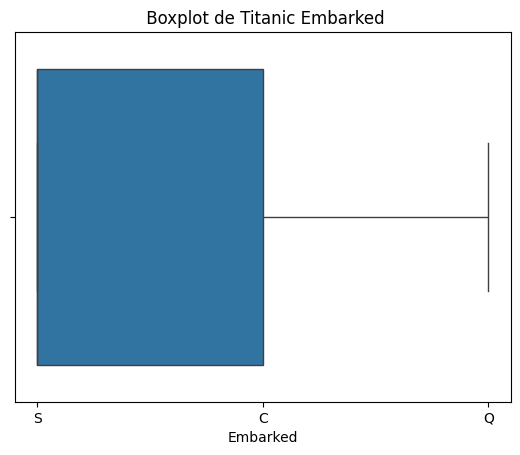

In [11]:
#observar comportamiento de las variables
df.hist(bins=10, figsize=(15,10))
plt.show()

# Boxplots para ver outliers
plt.figure(figsize=(8, 4))
for col in df.columns: #recorro columnas del dataframe
    sns.boxplot(x=df[col])
    plt.title(f' Boxplot de Titanic {col}')
    plt.show()

In [12]:
df[df["Fare"] > 300]

df = df[df["Fare"] <= 300]

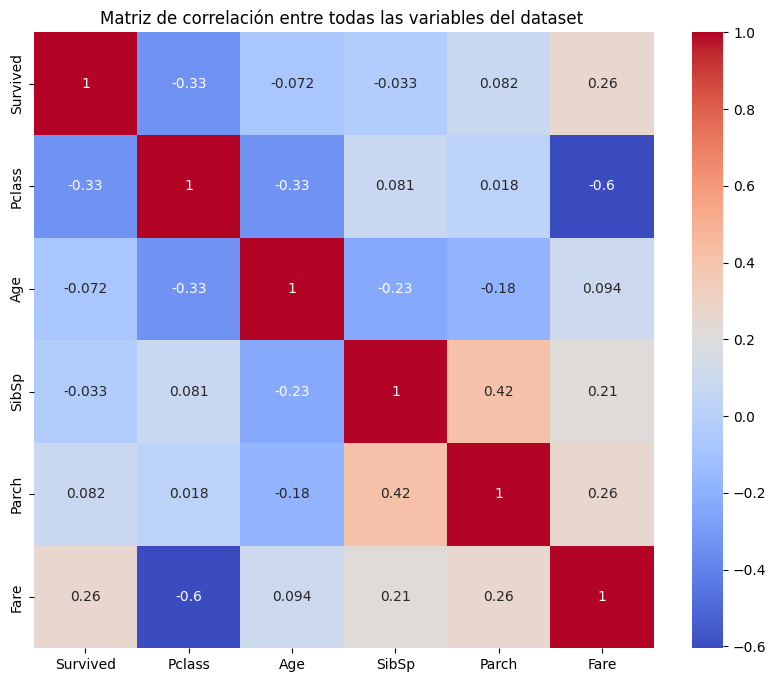

In [13]:
corr = df.select_dtypes(include=['number']).corr() #solo buscar correlacion entre las variables numericas


plt.figure(figsize=(10, 8))

#df
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre todas las variables del dataset ")
plt.show()

4. Preprocesamiento de Datos:

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Name      888 non-null    object 
 3   Sex       888 non-null    object 
 4   Age       888 non-null    float64
 5   SibSp     888 non-null    int64  
 6   Parch     888 non-null    int64  
 7   Ticket    888 non-null    object 
 8   Fare      888 non-null    float64
 9   Cabin     888 non-null    object 
 10  Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.2+ KB


In [19]:
# Dividir data en features y target data acotada.
X = df.drop(columns="Survived")
y = df["Survived"]

num_cols = ["Age", "Fare", "SibSp", "Parch", "Pclass"]
nom_cols = ["Sex", "Embarked", "Cabin", "Ticket", "Name"]



In [24]:
X= df.drop(columns="Survived")
y= df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

In [27]:
!pip install lightgbm optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.7 MB/s eta 0:00:00


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#optimizar parametros
import optuna
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

Regresión Logística

In [29]:
pipeline_lr = Pipeline([
    ("preprocessing", preprocessor),
   ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

In [30]:
#Entrenar
pipeline_lr.fit(X_train_split, y_train_split)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'Pclass']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Ticket', 'Name'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [31]:
y_pred_lr= pipeline_lr.predict(X_val_split)

y_pred_lr.shape

(178,)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       104
           1       0.81      0.82      0.82        74

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



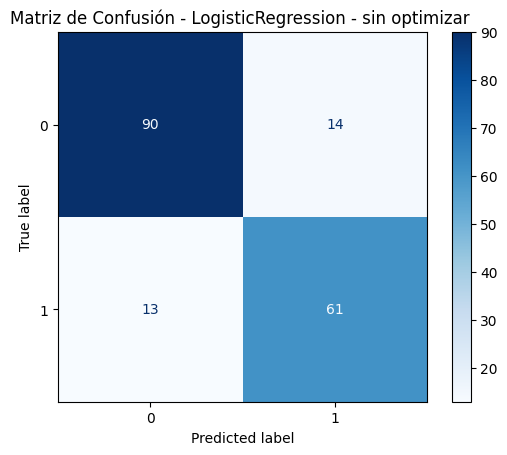

Accuracy del modelo sin optimizar: 0.848314606741573


In [32]:
#Evaluar modelo sin optimizar
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
print(classification_report(y_val_split, y_pred_lr))

cm_tree = confusion_matrix(y_val_split, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - LogisticRegression - sin optimizar ")
plt.show()

accuracy_tree = accuracy_score(y_val_split, y_pred_lr)
print(f"Accuracy del modelo sin optimizar:", accuracy_tree)

K-Nearest Neighbors (KNN),

In [33]:
def objective_knn(trial):

    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 50),
        "n_jobs": -1 #usar todos los nucleos
    }


    model = Pipeline([
        ("pre", preprocessor),
        ("knn", KNeighborsClassifier(**params))
    ])


    score_knn_red = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    return score_knn_red.mean()


In [34]:
study_knn = optuna.create_study(direction="maximize")

study_knn.optimize(objective_knn, n_trials=10)


optuna_bparams_knn = study_knn.best_params


print("Mejores hiperparámetros (red):", optuna_bparams_knn)

[I 2025-07-23 22:08:20,990] A new study created in memory with name: no-name-8af61eae-512b-4de9-aa05-8d4aecf2a399
[I 2025-07-23 22:08:29,638] Trial 0 finished with value: 0.024634301462794106 and parameters: {'n_neighbors': 34}. Best is trial 0 with value: 0.024634301462794106.
[I 2025-07-23 22:08:30,040] Trial 1 finished with value: 0.19321602713589142 and parameters: {'n_neighbors': 14}. Best is trial 1 with value: 0.19321602713589142.
[I 2025-07-23 22:08:30,476] Trial 2 finished with value: 0.1510705957176171 and parameters: {'n_neighbors': 24}. Best is trial 1 with value: 0.19321602713589142.
[I 2025-07-23 22:08:30,900] Trial 3 finished with value: 0.15709137163451342 and parameters: {'n_neighbors': 20}. Best is trial 1 with value: 0.19321602713589142.
[I 2025-07-23 22:08:31,379] Trial 4 finished with value: 0.006571973712105073 and parameters: {'n_neighbors': 42}. Best is trial 1 with value: 0.19321602713589142.
[I 2025-07-23 22:08:31,736] Trial 5 finished with value: 0.0487174051

Mejores hiperparámetros (red): {'n_neighbors': 18}


In [35]:
 # Pipeline.
pipeline_knn = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(**optuna_bparams_knn))
])

In [36]:
# Entrenar.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'Pclass']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Ticket', 'Name'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=18))])

In [37]:
y_pred_knn = pipeline_knn.predict(X_val_split)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       104
           1       0.85      0.77      0.81        74

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



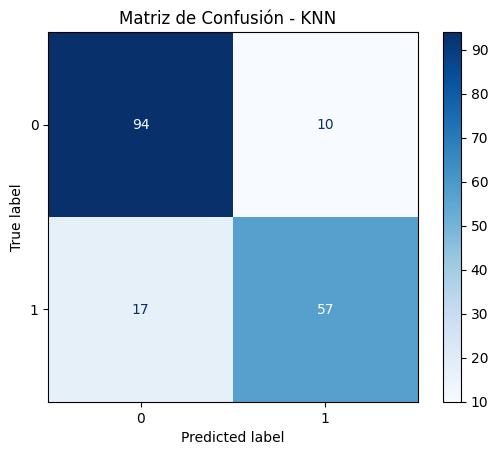

Accuracy del modelo sin optimizar: 0.848314606741573


In [38]:
print(classification_report(y_val_split, y_pred_knn))

cm_tree = confusion_matrix(y_val_split, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - KNN  ")
plt.show()

accuracy_tree = accuracy_score(y_val_split, y_pred_knn)
print(f"Accuracy del modelo sin optimizar:", accuracy_tree)

DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import optuna
import matplotlib.pyplot as plt

In [49]:
def objective_decision_tree(trial):
    params = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "max_depth": trial.suggest_int("max_depth", 1, 50),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None])  # SIN "auto"
    }

    model = Pipeline([
        ("pre", preprocessor),
        ("dt", DecisionTreeClassifier(**params, random_state=42))
    ])

    score_dt = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return score_dt.mean()


In [50]:
study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(objective_decision_tree, n_trials=10)
optuna_bparams_dt = study_dt.best_params
print("Mejores hiperparámetros (DecisionTree):", optuna_bparams_dt)

[I 2025-07-23 23:13:56,537] A new study created in memory with name: no-name-4fe3850b-ffbf-4a7c-846b-6cba372ed2f4
[I 2025-07-23 23:13:56,853] Trial 0 finished with value: 0.8028169014084506 and parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.8028169014084506.
[I 2025-07-23 23:13:57,070] Trial 1 finished with value: 0.652112676056338 and parameters: {'criterion': 'log_loss', 'max_depth': 34, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8028169014084506.
[I 2025-07-23 23:13:57,405] Trial 2 finished with value: 0.652112676056338 and parameters: {'criterion': 'log_loss', 'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8028169014084506.
[I 2025-07-23 23:13:57,854] Trial 3 finished with value: 0.6549295774647887 and parameters: {'criterion': 'entropy', 'max_depth'

Mejores hiperparámetros (DecisionTree): {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': None}


In [51]:
pipeline_dt = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier(**optuna_bparams_dt, random_state=42))
])

In [52]:
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_val_split)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.81      0.74      0.77        74

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



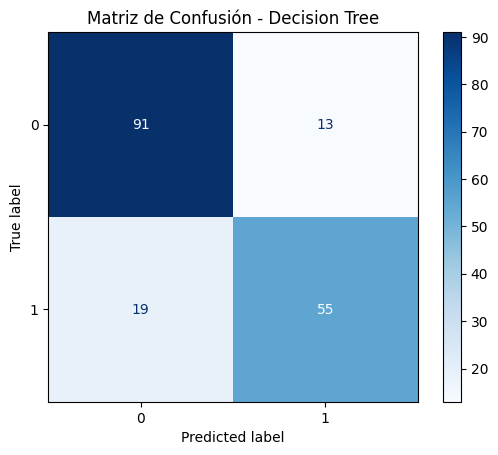

Accuracy del Decision Tree: 0.8202247191011236


In [53]:
print(classification_report(y_val_split, y_pred_dt))

cm_dt = confusion_matrix(y_val_split, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Decision Tree")
plt.show()

accuracy_dt = accuracy_score(y_val_split, y_pred_dt)
print(f"Accuracy del Decision Tree:", accuracy_dt)

XGBoost

In [54]:
from xgboost import XGBClassifier

In [55]:
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    model = Pipeline([
        ("pre", preprocessor),
        ("xgb", XGBClassifier(**params, random_state=42))
    ])

    score_xgb = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return score_xgb.mean()

In [56]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=10)

optuna_bparams_xgb = study_xgb.best_params
print("Mejores hiperparámetros (XGBoost):", optuna_bparams_xgb)

[I 2025-07-23 23:15:05,665] A new study created in memory with name: no-name-393d51e5-8b73-41fb-9ec1-cfd7c7763904
[I 2025-07-23 23:15:06,349] Trial 0 finished with value: 0.8112676056338028 and parameters: {'n_estimators': 326, 'max_depth': 7, 'learning_rate': 0.1859298475743033, 'subsample': 0.5999284247608995, 'colsample_bytree': 0.550351103701301, 'gamma': 0.9761705318500719, 'reg_alpha': 1.3605531915184943, 'reg_lambda': 2.163119899638514}. Best is trial 0 with value: 0.8112676056338028.
[I 2025-07-23 23:15:06,852] Trial 1 finished with value: 0.7943661971830986 and parameters: {'n_estimators': 354, 'max_depth': 18, 'learning_rate': 0.10897394153277898, 'subsample': 0.69931941699872, 'colsample_bytree': 0.7052198083214525, 'gamma': 4.418431914004434, 'reg_alpha': 1.6834435743241412, 'reg_lambda': 1.4752351080271415}. Best is trial 0 with value: 0.8112676056338028.
[I 2025-07-23 23:15:07,643] Trial 2 finished with value: 0.7943661971830986 and parameters: {'n_estimators': 419, 'max_

Mejores hiperparámetros (XGBoost): {'n_estimators': 171, 'max_depth': 13, 'learning_rate': 0.11267885027822357, 'subsample': 0.906183477975008, 'colsample_bytree': 0.8055430405433388, 'gamma': 1.7950391688626044, 'reg_alpha': 2.9433520003846896, 'reg_lambda': 0.32928948262159197}


In [57]:
pipeline_xgb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", XGBClassifier(**optuna_bparams_xgb, random_state=42, use_label_encoder=False, eval_metric="logloss"))
])

In [58]:
pipeline_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:15:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'Pclass']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Ticket', 'Name'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_...
                               gamma=1.7950391688626044, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.11267885027822357, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=13,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=171,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [59]:
y_pred_xgb = pipeline_xgb.predict(X_val_split)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87       104
           1       0.87      0.73      0.79        74

    accuracy                           0.84       178
   macro avg       0.85      0.83      0.83       178
weighted avg       0.85      0.84      0.84       178



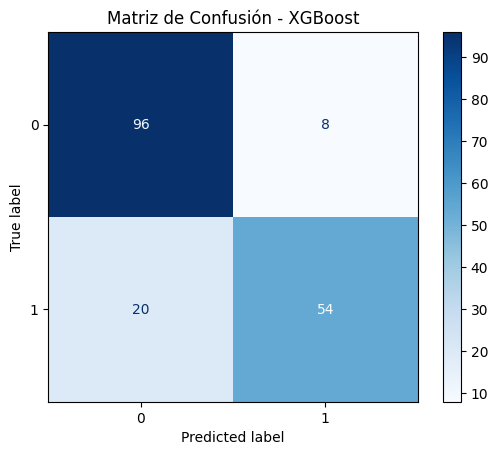

Accuracy del XGBoost: 0.8426966292134831


In [60]:
print(classification_report(y_val_split, y_pred_xgb))

cm_xgb = confusion_matrix(y_val_split, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - XGBoost")
plt.show()

accuracy_xgb = accuracy_score(y_val_split, y_pred_xgb)
print(f"Accuracy del XGBoost:", accuracy_xgb)

LightGBM

In [61]:
from lightgbm import LGBMClassifier

In [62]:
def objective_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 300),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5)
    }

    model = Pipeline([
        ("pre", preprocessor),
        ("lgbm", LGBMClassifier(**params, random_state=42))
    ])

    score_lgbm = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return score_lgbm.mean()

In [63]:
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=10)

[I 2025-07-23 23:17:21,923] A new study created in memory with name: no-name-12a73e90-7d6c-41e9-91de-58b77bb7a5dc
[I 2025-07-23 23:17:26,164] Trial 0 finished with value: 0.8098591549295776 and parameters: {'n_estimators': 217, 'max_depth': 20, 'learning_rate': 0.038623148672767435, 'num_leaves': 136, 'subsample': 0.9464773751332873, 'colsample_bytree': 0.8041525299575046, 'reg_alpha': 0.08945238537889089, 'reg_lambda': 2.205059281765809}. Best is trial 0 with value: 0.8098591549295776.
[I 2025-07-23 23:17:26,805] Trial 1 finished with value: 0.7985915492957747 and parameters: {'n_estimators': 318, 'max_depth': 13, 'learning_rate': 0.023028521273583086, 'num_leaves': 250, 'subsample': 0.8737613848608425, 'colsample_bytree': 0.5894867246409219, 'reg_alpha': 4.626333217165635, 'reg_lambda': 2.0562958935877544}. Best is trial 0 with value: 0.8098591549295776.
[I 2025-07-23 23:17:27,419] Trial 2 finished with value: 0.8014084507042254 and parameters: {'n_estimators': 378, 'max_depth': 12, 

In [64]:
optuna_bparams_lgbm = study_lgbm.best_params
print("Mejores hiperparámetros (LightGBM):", optuna_bparams_lgbm)

Mejores hiperparámetros (LightGBM): {'n_estimators': 157, 'max_depth': 19, 'learning_rate': 0.12232558030882058, 'num_leaves': 94, 'subsample': 0.9230551226498435, 'colsample_bytree': 0.7652416392900704, 'reg_alpha': 4.337890853589066, 'reg_lambda': 1.07694588025038}


In [65]:
pipeline_lgbm = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LGBMClassifier(**optuna_bparams_lgbm, random_state=42))
])


In [66]:
pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 265, number of negative: 445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 710, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373239 -> initscore=-0.518344
[LightGBM] [Info] Start training from score -0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'Pclass']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Ticket', 'Name'])])),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.7652416392900704,
                                learning_rate=0.12232558030882058, max_depth=19,
                                n_estimators=157, num_leaves=94,
                                random_state=42, reg_alpha=4.337890853589066,
                                reg_lambda=1.07694588025038,
                                subsample=0.9230551226498435))])

In [67]:
y_pred_lgbm = pipeline_lgbm.predict(X_val_split)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(classification_report(y_val_split, y_pred_lgbm))

cm_lgbm = confusion_matrix(y_val_split, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - LightGBM")
plt.show()

accuracy_lgbm = accuracy_score(y_val_split, y_pred_lgbm)
print(f"Accuracy del LightGBM:", accuracy_lgbm)

Comparar resultados

In [ ]:
# Modelo base Logistic Regression
y_pred_lr = pipeline_lr.predict(X_val_split)
y_pred_knn = pipeline_knn.predict(X_val_split)


y_pred_dt = pipeline_dt.predict(X_val_split)


y_pred_xgb = pipeline_xgb.predict(X_val_split)

y_pred_lgbm = pipeline_lgbm.predict(X_val_split)

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       104
           1       0.81      0.82      0.82        74

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178

Accuracy: 0.8483


=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       104
           1       0.85      0.77      0.81        74

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178

Accuracy: 0.8483


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.81      0.74      0.77        74

    accuracy                           0.82       178
   macro avg

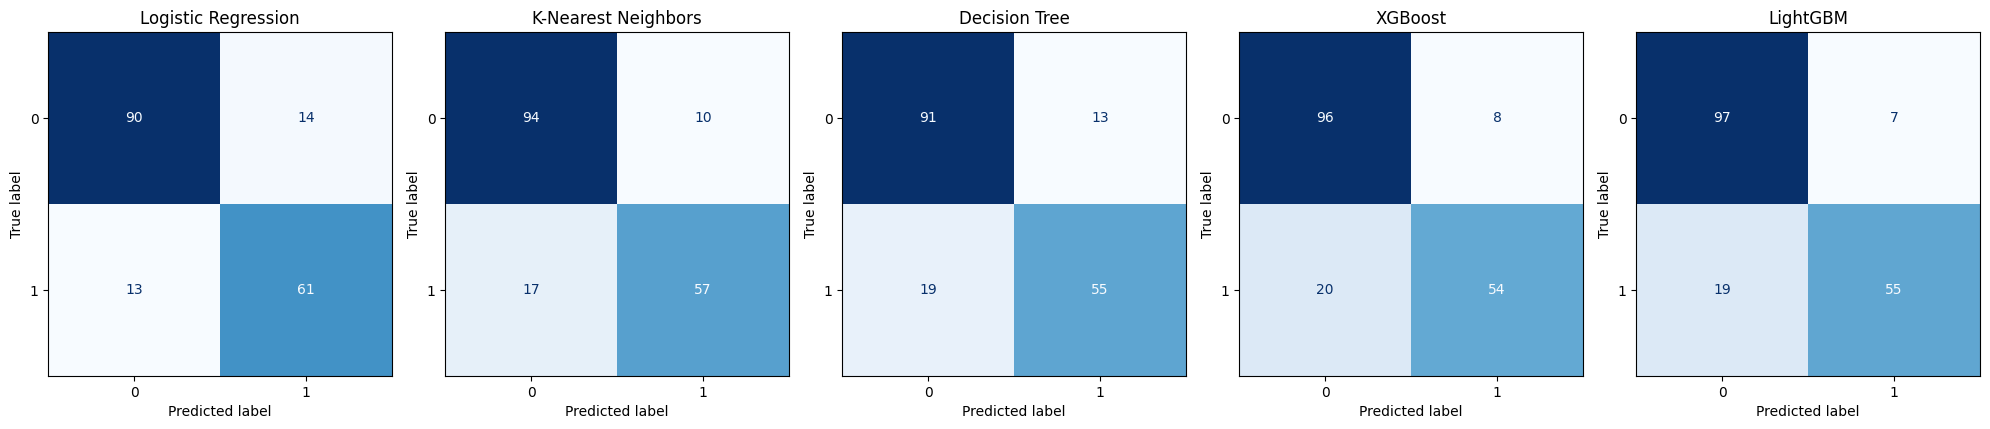

=== RESUMEN DE ACCURACY ===
 Logistic Regression: 0.8483
 K-Nearest Neighbors: 0.8483
       Decision Tree: 0.8202
             XGBoost: 0.8427
            LightGBM: 0.8539


In [68]:


modelos = {
    "Logistic Regression": y_pred_lr,
    "K-Nearest Neighbors": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgbm
}


fig, axes = plt.subplots(1, len(modelos), figsize=(20, 4))


accuracies = {}


for ax, (name, y_pred) in zip(axes, modelos.items()):
    print(f"=== {name} ===")
    print(classification_report(y_val_split, y_pred))

    cm = confusion_matrix(y_val_split, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    ax.set_title(name)

    acc = accuracy_score(y_val_split, y_pred)
    accuracies[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print("\n")

plt.tight_layout()
plt.show()

#  resumen de accuraY
print("=== RESUMEN DE ACCURACY ===")
for modelo, acc in accuracies.items():
    print(f"{modelo:>20}: {acc:.4f}")

Modelo elegido: LightGBM